<a href="https://colab.research.google.com/github/fernandodeeke/can2025/blob/main/bisection_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1></h1></center>
<center><h1>Numerical Calculus</h1></center>
<center><h2>2025/2</h2></center>
<center><h3>Fernando Deeke Sasse</h3></center>
<center><h3>CCT - UDESC</h3></center>
<center><h2>Bisection Method</h2></center>

### 1. Method

The general problem of finding roots is: given the function $f(x)$ we want to find $c$ such that $f(c) = 0$. This problem can only be solved exactly in some particular cases. For example, in the case of polynomials $P_n(x)=a_0+a_1x+a_x^2+\cdots+a_nx^n$, the exact solution only exists up to the fourth order ($n=4$). Even for $n=3.4$ the formulas are so long that they are rarely used. Another example is the equation $\cos x+x+1=0$. In these cases we must look for an approximate numerical solution, either real or complex. In our initial approach we will focus only on real solutions. The first approach to finding the real roots of an algebraic equation is to graph it.

Let us determine the approximate position of the real roots of $\cos x+x+1=0$ (if any) graphically:

In [ ]:
from matplotlib.pyplot import *
from sympy import *
init_printing()

In [ ]:
x=symbols('x')
f= Lambda(x, cos(x)+x+1)
f(x)

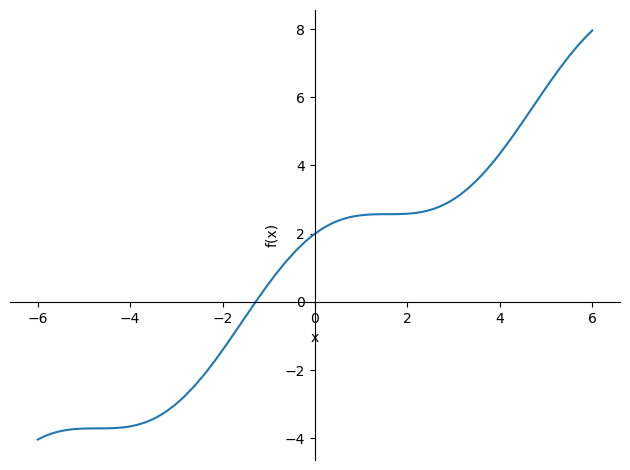

In [ ]:
plot(f(x),(x,-6,6))

From this graph we see that this equation has only one real root, located in the interval $(-2,-1/2)$. We will now see some numerical methods that allow the determination of a root with great accuracy and precision. The *bisection method* idea is intuitive:

Let $f(x)$ be a continuous function on $[a,b]$, such that $f(a)f(b) < 0$. Then there is real $c$ in $(a,b)$ such that $f(c) = 0$.

The general idea of the method is as follows:

* Choose an initial interval $[a,b]$ such that $f(a)f(b) < 0$
* Determine the midpoint of the interval $m = (a+b)/2$
* Determine if $f(m) > 0$ or $f(m) < 0$
* Choose the new interval to be $[a,m]$ if $f(a)f(m) < 0$. Otherwise choose $[m,b]$.
* Repeat the process until the gap size is smaller than a pre-set tolerance $\epsilon$ or a maximum number of iterations $N$.

### 2. Implementation

Suppose we want to find the real roots of the equation $x^4-\sin x-1=0$. We initially defined the variable *x* as being symbolic. Initially, we load the immediately needed libraries, which are the graphics library and the symbolic math library:

In [ ]:
from matplotlib.pyplot import *
from sympy import *
init_printing()

In [ ]:
x=symbols('x')

In [ ]:
f= Lambda(x, x**4-sin(x)-1)
f(x)

Let's graph this function:

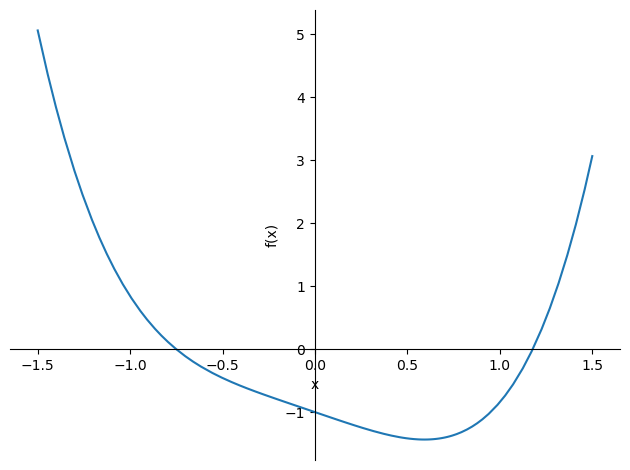

In [ ]:
plot(f(x),(x,-1.5,1.5))

Let us first determine the negative root. From the graph we know that it is in the range $[-1.0]$. Let's start the iterative process and do 30 repetitions, without worrying about the tolerance:

In [ ]:
a=-1
b=0
for n in range(1, 30):
    m1=(a+b)/2
    if f(m1)*f(a)<0:
        b=m1
    else:
        a=m1
print(m1)

-0.7508072983473539


Let's check the result:

In [ ]:
f(m1)

The positive root is in the interval $[1,1.5]$. Let's run the iterative process again:

In [ ]:
a=1
b=1.5
for n in range(1, 30):
    m2=(a+b)/2
    if f(m2)*f(a)<0:
        b=m2
    else:
        a=m2
print(m2)

1.1777034858241677


In [ ]:
f(m2)

We can encapsulate the above commands in a function that has as inputs the function $f$ whose zeros we want to find, the extremes $A$ and $B$ of the initial interval and the number of iterations $N$, where the root is the output .

In [ ]:
def bisect1(f,A,B,N):
    a=A
    b=B
    if f(a)*f(b)>=0:
        print('The method failed')
        return None
    for n in range(1, N+1):
        m=(a+b)/2
        if f(a)*f(m)<0:
            b=m
        else:
            a=m
    return (a+b)/2

Let's apply this procedure to find the real roots of $ x^4-\sin(x)-1$:

In [ ]:
r1=bisect1(f,-1,0,20)
r1

In [ ]:
r2=bisect1(f,0,2,20)
r2

Such results agree with what we calculated previously. Let's now build a procedure that has as inputs function $f$ whose zeros we want to find, the extremes $A$ and $B$ of the initial interval, the maximum number of iterations $N$ and the tolerance $\epsilon$ of the interval that contains the root. As output we have the root and the number of iterations performed.

In [ ]:
def bisect2(f,A,B,Nmax, epsilon):
    a=A
    b=B
    erro=1
    n=0
    while erro>epsilon and n<Nmax:
        if f(a)*f(b)>=0:
            print('The method failed')
            return None
        m=(a+b)/2
        if f(a)*f(m)<0:
            b=m
        else:
            a=m
        erro=abs(a-b)
        n=n+1
    return (a+b)/2,n

In [ ]:
r1=bisect2(f,-1,0,40,10**(-10))
r1

The root value can be selected as follows:

In [ ]:
R1=r1[0]
R1

Let's check the accuracy of the result:

In [ ]:
f(R1)

Similarly for the positive root:

In [ ]:
r2=bisect2(f,0,2,40,10**(-10))
r2

In [ ]:
R2=r2[0]
R2

In [ ]:
f(R2)

Let's examine the average CPU time for determining the root $R1$:

In [ ]:
%%timeit
bisect2(f,-1,0,40,10**(-10))

4.08 ms ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Although our program is not optimized to be fast, the time required to determine a root with great accuracy is reasonably small.

### 3. Relationship between accuracy and number of iterations

After the first iteration of the bisection method, the size $\epsilon_1$ of the new interval that contains the root is the size of the original interval $|a-b|$ divided by 2, that is,

$$
\epsilon_1=\frac{|a-b|}{2}\,.
$$

After $n$ repetitions of the process the size of the interval is

$$
\epsilon_n=\frac{|a-b|}{2^n}\,.
$$


Therefore, for any bisection process, given the desired accuracy range $\epsilon_n$, we can determine in advance the number of required iterations:

$$
n = \log_2\left(\frac{|a-b|}{\epsilon_n}\right)\,.
$$

Since the interval is divided by 2 at each iteration, we say that the convergence of the bisection method is linear. For example, for an accuracy interval of at most $10^{-10}$ and initial interval of size 2, we have:

In [ ]:
import numpy as np

In [ ]:
n = np.log2(2/10**(-10))
n

To get the integer approximation rounded up (important when defining a function) we use

In [ ]:
int(np.ceil(n))

so we must choose $n=35$ to obtain an accuracy interval smaller than $10^{-10}$.

Let's define a function that takes as input the function, the range, and the range accuracy:

In [ ]:
def bisect3(f,A,B,epsilon):
    a=A
    b=B
    n = int(np.ceil(np.log2(abs(b-a)/epsilon)))
    for i in range(1, n+1):
        if f(a)*f(b)>=0:
            print('The method failed')
            return None
        m=(a+b)/2
        if f(a)*f(m)<0:
            b=m
        else:
            a=m
    return (a+b)/2,n

Let's test our function:

In [ ]:
bisect3(f,0,2,10**(-10))

### 4. Final considerations

Advantages of the bisection method:

* The method is always convergent and can be used as a starter for more accurate methods.
* Since the intervals containing the root are halved at each iteration, we can predict the error in the solution.

Disadvantages of the bisection method:

* Convergence is slow (linear), because at each step the interval containing the root is only reduced by half.
* The method does not work for determining multiple roots.


### 5. Exercises

<bf>1.</bf> In the items below, graph each function to determine the real roots (if any) and their number. Then determine each one of them through the bisection method, with an interval accuracy of $10^{-11}$, determining the necessary number of iterations.

(i) $\mbox{e}^x+x+1=0$,

(ii) $\mbox{e}^{-x}+x=0$,

(iii) $x^3-9x^2-x-4\sin x+2 =0$.

<bf>2.</bf> Determine how many real solutions the equation $\sin x-\cos(x^2) = 0$ has in the interval $[0,4]$ and how many in the interval $[4,6] $.
Numerically determine the largest roots in each interval, with an interval accuracy of $10^{-7}$.

### Some solutions

1. (i) Let's use the sympy library, as well as the matplotlib graphics library:

In [ ]:
from matplotlib.pyplot import *
from sympy import *
init_printing()

In [ ]:
x=symbols('x')
f= Lambda(x, exp(x)+x+1)
f

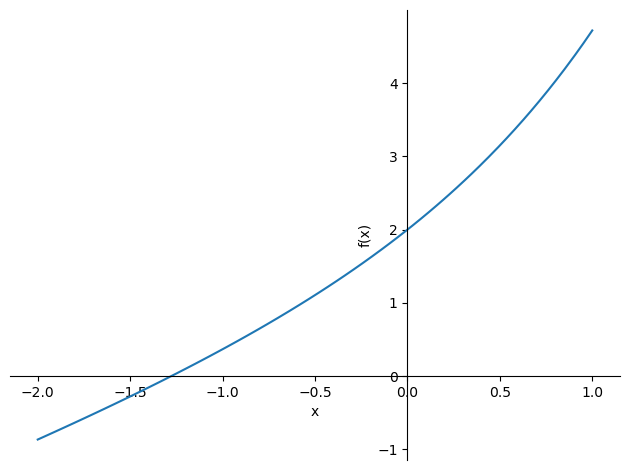

In [ ]:
plot(f(x),(x,-2,1))

We have a single real root, in the interval [-2,-1].

Let's use the bisect3 function, defined earlier:

In [ ]:
import numpy as np

In [ ]:
def bisect3(f,A,B,epsilon):
    a=A
    b=B
    n = int(np.ceil(np.log2(abs(b-a)/epsilon)))
    for i in range(1, n+1):
        if f(a)*f(b)>=0:
            print('The method failed')
            return None
        m=(a+b)/2
        if f(a)*f(m)<0:
            b=m
        else:
            a=m
    return (a+b)/2,n

In [ ]:
bisect3(f,-2,-1,10**(-11))

so 37 iterations were required.

In [ ]:
(r,n) = bisect3(f,-2,-1,10**(-11))

In [ ]:
r

Let's check the result:

In [ ]:
f(r)